In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder

data= pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/diamond.csv')
data.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [ ]:
data.dtypes

Carat Weight    float64
Cut              object
Color            object
Clarity          object
Polish           object
Symmetry         object
Report           object
Price             int64
dtype: object

# analyzing categorical features in python

### value_count()-returns the frequency of each unique value in a categorical data column.

In [ ]:
# check value counts of Cut column
data['Cut'].value_counts()

Ideal              2482
Very Good          2428
Good                708
Signature-Ideal     253
Fair                129
Name: Cut, dtype: int64

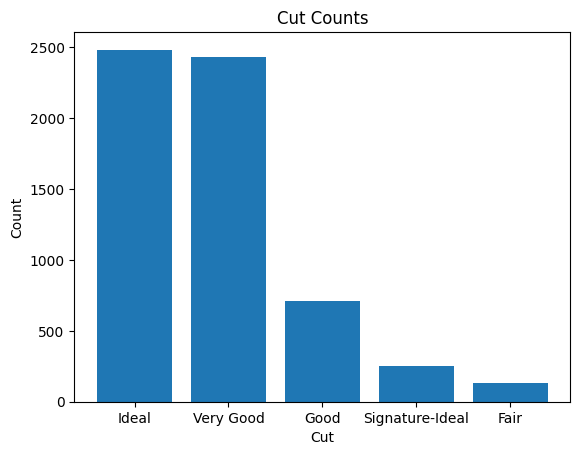

In [ ]:
cut_counts = data['Cut'].value_counts()

plt.bar(cut_counts.index, cut_counts.values)
plt.xlabel('Cut')
plt.ylabel('Count')
plt.title('Cut Counts')
plt.show()


### groupby()-group data by one or more columns and apply aggregate functions such as sum, mean, and count.

In [ ]:
data.groupby(by = 'Cut').mean()


/var/folders/df/j6vmwc2x15zcnhjldjcpv62m0000gn/T/ipykernel_1931/1773436121.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(by = 'Cut').mean()


,Carat Weight,Price
Cut,,
Fair,1.058682,5886.178295
Good,1.268927,9326.656780
Ideal,1.382293,13127.331185
Signature-Ideal,1.205217,11541.525692
Very Good,1.332941,11484.696870


In [ ]:
data.groupby(by = 'Cut').sum()


/var/folders/df/j6vmwc2x15zcnhjldjcpv62m0000gn/T/ipykernel_1931/3215091171.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(by = 'Cut').sum()


,Carat Weight,Price
Cut,,
Fair,136.57,759317
Good,898.40,6603273
Ideal,3430.85,32582036
Signature-Ideal,304.92,2920006
Very Good,3236.38,27884844


In [ ]:
data.groupby(by = 'Cut').count()

,Carat Weight,Color,Clarity,Polish,Symmetry,Report,Price
Cut,,,,,,,
Fair,129,129,129,129,129,129,129
Good,708,708,708,708,708,708,708
Ideal,2482,2482,2482,2482,2482,2482,2482
Signature-Ideal,253,253,253,253,253,253,253
Very Good,2428,2428,2428,2428,2428,2428,2428


### crosstab()-cross-tabulation table, which shows the frequency distribution of two or more categorical variables.

In [ ]:
pd.crosstab(index=data['Cut'], columns=data['Color'])


Color,D,E,F,G,H,I
Cut,,,,,,
Fair,12,32,24,21,24,16
Good,74,110,133,148,128,115
Ideal,280,278,363,690,458,413
Signature-Ideal,30,35,38,64,45,41
Very Good,265,323,455,578,424,383


### pivot_table()-analyze multiple categorical variables and their relationship to one or more numeric variables. Pivot tables allow you to aggregate data in multiple ways and display the results in a compact form.

In [ ]:
pd.pivot_table(data, values='Price', index='Cut', columns='Color', aggfunc=np.mean)

Color,D,E,F,G,H,I
Cut,,,,,,
Fair,6058.250000,5370.625000,6063.625000,7345.523810,5908.500000,4573.187500
Good,10058.716216,8969.545455,9274.007519,9988.614865,9535.132812,8174.113043
Ideal,18461.953571,12647.107914,14729.426997,13570.310145,11527.700873,9459.588378
Signature-Ideal,19823.100000,11261.914286,13247.947368,10248.296875,9112.688889,8823.463415
Very Good,13218.826415,12101.910217,12413.905495,12354.013841,10056.106132,8930.031332


# one hot encoding

### pandas categorical to numerical -by using the `pd.get_dummies()` method.

In [ ]:
import pandas as pd

# generate df with 1 col and 4 rows
data = {
    "fruit": ["apple", "banana", "orange", "apple"]
}

# show head
df = pd.DataFrame(data)
df.head()
# apply get_dummies function
df_encoded = pd.get_dummies(df["fruit"])
df_encoded .head()


,apple,banana,orange
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


### `OneHotEncoder` from the sklearn library

In [ ]:
import pandas as pd

# generate df with 1 col and 4 rows
data = {
    "fruit": ["apple", "banana", "orange", "apple"]
}

# one-hot-encode using sklearn
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_results = encoder.fit_transform(df).toarray()
